In [1]:
#import and setup
import pandas as pd
import os
import matplotlib.pyplot as plt # for graphs

In [2]:
# get data frame of stocks with market cap > 100 Million, and price above $3
# i downloaded all the stocks from nasdaq in 22/05/2021

stocksDataframe = pd.read_csv(
   r'D:\yudgimel\project\stocks\nasdaq_screener_22052021.csv' ) # turn csv file to pandas dataframe

stocksDataframe = stocksDataframe.rename(columns={'Market Cap': 'marketCap', 'Last Sale' : 'price', 'Symbol' : 'symbol'}) # rename coloumns
nasdaqStocks = stocksDataframe[["symbol", "price", "marketCap"]] # take only the coloumns i need

nasdaqStocks = nasdaqStocks[nasdaqStocks.marketCap > 100000000] # 'remove stocks with market cap below 100 Million

nasdaqStocks['price'] = nasdaqStocks['price'].str.replace('$','') # in order to change string coloumn to int coloumn we romve $ 
nasdaqStocks['price'] = nasdaqStocks['price'].astype(float) # change price coloumn to float
nasdaqStocks = nasdaqStocks[nasdaqStocks.price > 3] # 'remove stocks with market cap below 100 Million


# turn dataframe to list of alltickers
nasdaqStocks.drop(['price', 'marketCap'], axis=1, inplace=True) # remove unneccesery coloumns
alltickers = nasdaqStocks.values.tolist() # turn dataframe to list. it will create list of lists
alltickers = [''.join(ele) for ele in alltickers] # Convert List of lists to list of Strings using list comprehension + join()

<ipython-input-2-467a1f31d581>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  nasdaqStocks['price'] = nasdaqStocks['price'].str.replace('$','') # in order to change string coloumn to int coloumn we romve $


In [3]:
# includes common words and words used on wsb that are also stock names
blacklist = {'I', 'ARE',  'ON', 'GO', 'NOW', 'CAN', 'UK', 'SO', 'OR', 'OUT', 'SEE', 'ONE', 'LOVE', 'U', 'STAY', 'HAS', 'BY', 'BIG', 'GOOD', 'RIDE', 'EOD', 'ELON', 'WSB', 'THE', 'A', 'ROPE', 'YOLO', 'TOS', 'CEO', 'DD', 'IT', 'OPEN', 'ATH', 'PM', 'IRS', 'FOR','DEC', 'BE', 'IMO', 'ALL', 'RH', 'EV', 'TOS', 'CFO', 'CTO', 'DD', 'BTFD', 'WSB', 'OK', 'PDT', 'RH', 'KYS', 'FD', 'TYS', 'US', 'USA', 'IT', 'ATH', 'RIP', 'BMW', 'GDP', 'OTM', 'ATM', 'ITM', 'IMO', 'LOL', 'AM', 'BE', 'PR', 'PRAY', 'PT', 'FBI', 'SEC', 'GOD', 'NOT', 'POS', 'FOMO', 'TL;DR', 'EDIT', 'STILL', 'WTF', 'RAW', 'PM', 'LMAO', 'LMFAO', 'ROFL', 'EZ', 'RED', 'BEZOS', 'TICK', 'IS', 'PM', 'LPT', 'GOAT', 'FL', 'CA', 'IL', 'MACD', 'HQ', 'OP', 'PS', 'AH', 'TL', 'JAN', 'FEB', 'JUL', 'AUG', 'SEP', 'SEPT', 'OCT', 'NOV', 'FDA', 'IV', 'ER', 'IPO', 'MILF', 'BUT', 'SSN', 'FIFA', 'USD', 'CPU', 'AT', 'GG', 'Mar'}

In [4]:
# adding wsb/reddit flavour to vader to improve sentiment analysis, score: 4.0 to -4.0
new_words = {
    'trash': -4.0,
    'garbage': -4.0,
    'citron': -4.0,  
    'hidenburg': -4.0,    
    'rocket': 4.0,  
    'moon': 4.0,
    'highs': 2.0,
    'mooning': 4.0,
    'long': 2.0,
    'short': -2.0,
    'call': 4.0,
    'calls': 4.0,    
    'put': -4.0,
    'puts': -4.0,    
    'break': 2.0,
    'tendie': 2.0,
     'tendies': 2.0,
     'town': 2.0,     
     'overvalued': -3.0,
     'undervalued': 3.0,
     'buy': 4.0,
     'sell': -4.0,
     'gone': -1.0,
     'gtfo': -1.7,
     'paper': -1.7,
     'bullish': 3.7,
     'bearish': -3.7,
     'bagholder': -1.7,
     'stonk': 1.9,
     'green': 1.9,
     'money': 1.2,
     'print': 2.2,
     'rocket': 2.2,
     'bull': 2.9,
     'bear': -2.9,
     'pumping': -1.0,
     'sus': -3.0,
     'offering': -2.3,
     'rip': -4.0,
     'downgrade': -3.0,
     'upgrade': 3.0,     
     'maintain': 1.0,          
     'pump': 1.9,
     'hot': 1.5,
     'drop': -2.5,
     'rebound': 1.5,  
     'crack': 2.5,}

In [5]:
# now sentiment part

In [6]:
# imports
import praw # PRAW, an acronym for “Python Reddit API Wrapper”, is a Python package that allows for simple access for reddit api
import sys
sys.path.append(r"D:\yudgimel\project\stocks")
from redditData import *
import time
import pandas as pd
import matplotlib.pyplot as plt

import squarify #
from nltk.sentiment.vader import SentimentIntensityAnalyzer # Natural Language Toolkit

start_time = time.time()

D:\yudgimel\project\stocks\redditData.py:29: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  nasdaqStocks['price'] = nasdaqStocks['price'].str.replace('$','') # in order to change string coloumn to int coloumn we romve $


In [7]:
# set up and connect reddit api
reddit = praw.Reddit(
    user_agent="Comment Extraction",
    client_id="oh8OoK_GVWtrxA",
    client_secret="7ak5eGyYS9xGf_bzlAgMVJiWxyt-kg"
)

In [8]:
# set the program parameters
subs = ['wallstreetbets', 'stocks', 'investing', 'stockmarket'] # sub-reddit to search
post_flairs = {'Daily Discussion', 'Weekend Discussion', 'Discussion'} # posts flairs ('categorizing' posts submitted by users) to search || None flair is automatically considered
goodAuth = {'AutoModerator'} # מנהלים
uniqueCmt = True # allow one comment per author per symbol
ignoreAuthP = {'example'} # authors to ignore for posts 
ignoreAuthC = {'example'} # authors to ignore for comment 
upvoteRatio = 0.70 # upvote ratio for post to be considered, 0.70 = 70%
ups = 20 # define # of upvotes, post is considered if upvotes exceed this #
limit = 10 # define the limit, comments 'replace more' limit
upvotes = 2 # define # of upvotes, comment is considered if upvotes exceed this #
picks = 10 # define # of picks here, prints as "Top ## picks are:"
picks_ayz = 5 # define # of picks for sentiment analysis. takes a lot of time so i did only 5

posts, count, c_analyzed, tickers, titles, a_comments = 0, 0, 0, {}, [], {}
cmt_auth = {}

In [9]:
# main loop
for sub in subs: # for each subreddit (foroum)
    subreddit = reddit.subreddit(sub)
    hot_python = subreddit.hot()    # sorting posts by hot - get 25 most popular posts

    # Extracting comments, symbols from subreddit
    for submission in hot_python: # for each post
        flair = submission.link_flair_text  # Link flairs are tags assigned to posts giving them some type of designation
        if submission.author is not None:
            author = submission.author.name
        else:
            author = ""         
        
        # checking: post upvote ratio # of upvotes, post flair, and author 
        if submission.upvote_ratio >= upvoteRatio and submission.ups > ups and (flair in post_flairs or flair is None) and author not in ignoreAuthP:   
            submission.comment_sort = 'new'     
            comments = submission.comments
            titles.append(submission.title)
            posts += 1
            submission.comments.replace_more(limit=limit) # לתגובה יש תגובה שהגיבו לה אז זה מציג עש 10 תכתובות

            for comment in comments:
                # try except for deleted account?
                try: auth = comment.author.name
                except: pass
                c_analyzed += 1
 
                # checking: comment upvotes and author
                if comment.score > upvotes and auth not in ignoreAuthC:      
                    split = comment.body.split(" ") # array of all the words in the comment

                    for word in split:
                        word = word.replace("$", "")   

                        # upper = ticker, length of ticker <= 5,           excluded words.       we check if the word is a ticker                     
                        if word.isupper() and len(word) <= 5 and word not in blacklist and word in alltickers:
                            
                            # unique comments, try/except for key errors
                            if uniqueCmt and auth not in goodAuth: # if we want this author
                                try: 
                                    if auth in cmt_auth[word]: break
                                except: pass
                                
                            # counting tickers
                            if word in tickers:
                                tickers[word] += 1
                                a_comments[word].append(comment.body) # for sentiment analysise add body of comment to dictionary
                                cmt_auth[word].append(auth)
                                count += 1
                            else: #fisrt time we saw stocks                              
                                tickers[word] = 1
                                cmt_auth[word] = [auth]
                                a_comments[word] = [comment.body]
                                count += 1    

In [10]:
# sorts the dictionary
symbols = dict(sorted(tickers.items(), key=lambda item: item[1], reverse = True)) # at the top will be the most seen ticker
top_picks = list(symbols.keys())[0:picks] # extract array of the tickers
time = (time.time() - start_time)

In [11]:
print(symbols)

{'TSLA': 30, 'AAPL': 23, 'NVDA': 16, 'AMD': 15, 'MSFT': 12, 'COIN': 10, 'AMZN': 6, 'FB': 6, 'CRSR': 6, 'DKNG': 5, 'MVIS': 4, 'ABNB': 4, 'GOOG': 4, 'VERY': 4, 'TLRY': 3, 'RIOT': 3, 'VIAC': 3, 'PYPL': 3, 'GOOGL': 3, 'ASML': 3, 'AMAT': 3, 'PZZA': 2, 'INTC': 2, 'IQ': 2, 'MARA': 2, 'AGNC': 2, 'APPS': 2, 'ADBE': 2, 'JD': 2, 'TTCF': 2, 'RICK': 2, 'EYES': 1, 'GLAD': 1, 'CGC': 1, 'TA': 1, 'CZR': 1, 'CLNE': 1, 'TECH': 1, 'TIL': 1, 'CLOV': 1, 'BMBL': 1, 'ARVL': 1, 'LAZR': 1, 'BLNK': 1, 'PLUG': 1, 'SBUX': 1, 'ENPH': 1, 'HRZN': 1, 'PSEC': 1, 'Z': 1, 'NFLX': 1, 'JBLU': 1, 'OPRX': 1, 'CSX': 1, 'IDXX': 1, 'NDAQ': 1, 'MIME': 1, 'NXST': 1, 'POSH': 1, 'STMP': 1, 'ALT': 1, 'VUZI': 1, 'PTON': 1, 'SPLK': 1, 'DXCM': 1, 'BYND': 1, 'WB': 1, 'EVER': 1, 'EOSE': 1, 'FCEL': 1, 'CLSK': 1, 'FNKO': 1, 'ROIC': 1, 'XLNX': 1, 'DISCA': 1, 'TRUE': 1, 'RILY': 1, 'TIGR': 1}


In [12]:
# print top picks
from myDate import*
dt_now = dt_string
print("It took {t:.2f} seconds to analyze {c} comments in {p} posts in {s} subreddits. {dt}\n".format(t=time, c=c_analyzed, p=posts, s=len(subs), dt=dt_now))
print("Posts analyzed saved in titles")
#for i in titles: print(i)  # prints the title of the posts analyzed

print(f"\n{picks} most mentioned picks: ")
times = []
top = []
for i in top_picks:
    print(f"{i}: {symbols[i]}")
    times.append(symbols[i])
    top.append(f"{i}: {symbols[i]}")

It took 216.28 seconds to analyze 6117 comments in 79 posts in 4 subreddits. 25052021212918

Posts analyzed saved in titles

10 most mentioned picks: 
TSLA: 30
AAPL: 23
NVDA: 16
AMD: 15
MSFT: 12
COIN: 10
AMZN: 6
FB: 6
CRSR: 6
DKNG: 5


In [13]:
# Applying Sentiment Analysis
scores, s = {}, {}
 
vader = SentimentIntensityAnalyzer()
# adding custom words from data.py 
vader.lexicon.update(new_words)

picks_sentiment = list(symbols.keys())[0:picks_ayz] # first 5
for symbol in picks_sentiment:
    stock_comments = a_comments[symbol]
    for cmnt in stock_comments:
        score = vader.polarity_scores(cmnt)
        if symbol in s:
            s[symbol][cmnt] = score
        else:
            s[symbol] = {cmnt:score}      
        if symbol in scores:
            for key, _ in score.items():
                scores[symbol][key] += score[key]
        else:
            scores[symbol] = score
            
    # calculating avg.
    for key in score:
        scores[symbol][key] = scores[symbol][key] / symbols[symbol]
        scores[symbol][key]  = "{pol:.3f}".format(pol=scores[symbol][key])
 
print('\n before save image \n')
# printing sentiment analysis 
print(f"\nSentiment analysis of top {picks_ayz} picks:")
df = pd.DataFrame(scores)
df.index = ['negative', 'Neutral', 'positive', 'Total/Compound']
df = df.T
print(df)


 before save image 


Sentiment analysis of top 5 picks:
     negative Neutral positive Total/Compound
TSLA    0.077   0.802    0.121          0.078
AAPL    0.063   0.831    0.107          0.339
NVDA    0.095   0.728    0.177          0.213
AMD     0.074   0.736    0.189          0.458
MSFT    0.024   0.855    0.121          0.434


In [14]:
scores

{'TSLA': {'neg': '0.077', 'neu': '0.802', 'pos': '0.121', 'compound': '0.078'},
 'AAPL': {'neg': '0.063', 'neu': '0.831', 'pos': '0.107', 'compound': '0.339'},
 'NVDA': {'neg': '0.095', 'neu': '0.728', 'pos': '0.177', 'compound': '0.213'},
 'AMD': {'neg': '0.074', 'neu': '0.736', 'pos': '0.189', 'compound': '0.458'},
 'MSFT': {'neg': '0.024', 'neu': '0.855', 'pos': '0.121', 'compound': '0.434'}}

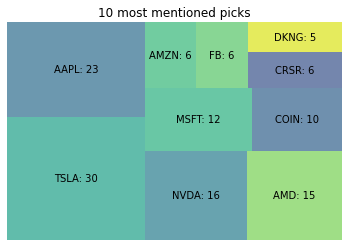

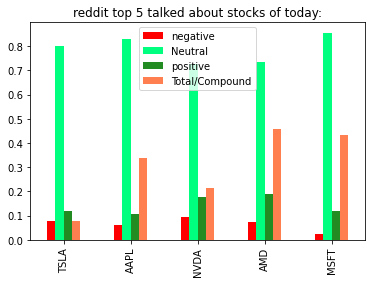

In [36]:
# Date Visualization
# most mentioned picks    
squarify.plot(sizes=times, label=top, alpha=.7 )
plt.axis('off')
plt.title(f"{picks} most mentioned picks")
mentioned_picks_fig_place = r"D:/yudgimel/project/website/static/images/redditSen/"+dt_now+'10mentioned.PNG'
plt.savefig(mentioned_picks_fig_place)

# Sentiment analysis
df = df.astype(float)
colors = ['red', 'springgreen', 'forestgreen', 'coral']
df.plot(kind = 'bar', color=colors, title=f"reddit top {picks_ayz} talked about stocks of today:")
sentiment_anylasise_fig_place = r"D:/yudgimel/project/website/static/images/redditSen/"+dt_now+'5analyasise.PNG'
plt.savefig(sentiment_anylasise_fig_place)



In [17]:
sentiment_anylasise_fig_place

'D:/yudgimel/project/website/static/images/redditSen/250520212129185analyasise.PNG'

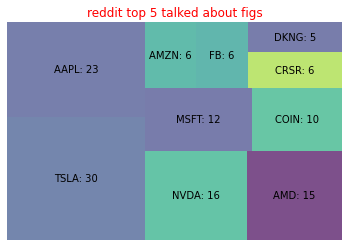

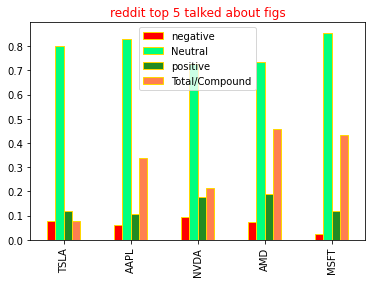

In [48]:


squarify.plot(sizes=times, label=top, alpha=.7 )
plt.axis('off')
plt.title(f"{picks} most mentioned picks")
mentioned_picks_fig_place = r"D:/yudgimel/project/website/static/images/redditSen/"+'10mentioned.PNG'
title_obj = plt.title(picks, ' most mentioned stocks on reddit') #get the title property handler
plt.setp(title_obj, color='r')         #set the color of title to red
plt.savefig(mentioned_picks_fig_place, facecolor="white", edgecolor="none")

# Sentiment analysis
df = df.astype(float)
colors = ['red', 'springgreen', 'forestgreen', 'coral']
df.plot(kind = 'bar', color=colors, title=f"reddit top {picks_ayz} talked about stocks of today:", edgecolor='gold')
sentiment_anylasise_fig_place = r"D:/yudgimel/project/website/static/images/redditSen/"+'5analyasise.PNG'
title_obj = plt.title('reddit top ', picks_ayz,' talked about stocks of today: ') #get the title property handler
plt.setp(title_obj, color='r')         #set the color of title to red

plt.savefig(sentiment_anylasise_fig_place, facecolor="white", edgecolor="none")
